# Indice
1. [Introduction](#introduction)
2. [Preparando la información](#paragraph1)
3. [¿Cuántos nacimientos hay por año en el país?](#paragraph2)
4. [¿Cuántos nacimientos hay por año en el país según el grupo etario de la madre?](#paragraph3)
5. [¿Que proporción de madres tuvo hijos antes de los 20?](#paragraph4)
6. [Para cada nivel de instrucción/educación, ¿Cuántos nacimientos hubo en cada grupo etario?](#paragraph5)
7. [Referencias técnicas](#paragraph6)


## Introducción <a name="introduction"></a>

---
En esta propuesta vamos a usar datos del ministerio de salud sobre nacimientos en el país entre 2005 y 2010 para hacer algunas preguntas y obtener una respuesta visual con gráficos.
---


# Qué información podemos obtener:
* ¿Cuántos nacimientos hay por año en el país?
* ¿Cuántos nacimientos hay por año en el país según el grupo etario de la madre?
* ¿Que proporción de madres tuvo hijos antes de los 20?
* Para cada nivel de instrucción/educación, ¿Cuántos nacimientos hubo en cada grupo etario?

## Link donde obtengo el dataset
El dataset viene del ministerio de salud y puede encontrarse en: 
http://datos.salud.gob.ar/dataset/nacidos-vivos-registrados-por-jurisdiccion-de-residencia-de-la-madre-republica-argentina-ano-2017/archivo/3c891522-8448-4490-a7da-6deba78d3b32
Aunque los datos fueron limpiados para facilitar su uso

Antes de empezar, una aclaración: En muchos lugares de la ejecución, se puede ver un SettingWithCopyWarning que nos avisa que estamos tratando de colocar una parte de una copia del dataframe en el dataframe. Esto no es un problema y se puede ignorar

## Preparando la información <a name="paragraph1"></a>


Primero importamos pandas, esto nos permitirá usar las funciones que provee, es costumbre renombrarla como **pd** y también el módulo pyplot de matplotlib normalmente abreviado como **plt**

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

Usamos la función **read_csv** que nos transforma nuestros datos (en formato csv) a un dataframe que podemos manipular fácilmente.

In [41]:
nacimientos = pd.read_csv("Nacimientos_Arg_2005-2010.csv",encoding = "UTF-8")

Vamos a ver como vemos la información:

In [42]:
nacimientos.head()

anio  jurisdiccion_de_residencia_id    jurisdicion_residencia_nombre  \
0  2005                              2  Ciudad Autónoma de Buenos Aires   
1  2005                              2  Ciudad Autónoma de Buenos Aires   
2  2005                              2  Ciudad Autónoma de Buenos Aires   
3  2005                              2  Ciudad Autónoma de Buenos Aires   
4  2005                              2  Ciudad Autónoma de Buenos Aires   

   edad_madre_grupo_id edad_madre_grupo                instruccion_madre  \
0                    5          30 a 34  Secundaria/Polimodal Incompleta   
1                    5          30 a 34         Primaria/C. EGB Completa   
2                    4          25 a 29    Secundaria/Polimodal Completa   
3                    5          30 a 34  Secundaria/Polimodal Incompleta   
4                    4          25 a 29    Secundaria/Polimodal Completa   

   semana_gestacion_id semana_gestacion intervalo_peso_al_nacer       Sexo  \
0                    4          28 a 31             1500 a 1999  masculino   
1                    4          28 a 31               500 a 999  masculino   
2                    4          28 a 31             1000 a 1499  masculino   
3                    5          32 a 36             1500 a 1999  masculino   
4                    4          28 a 31             1500 a 1999  masculino   

   nacimientos_cantidad  
0                     1  
1                     2  
2                     6  
3                     5  
4                     1

No vamos a trabajar con toda la información, asi que la cortamos a las columnas que nos interesan:

In [43]:
nacimientos = nacimientos[["anio","edad_madre_grupo","instruccion_madre","Sexo","nacimientos_cantidad"]]

In [44]:
nacimientos

anio edad_madre_grupo                   instruccion_madre  \
0       2005          30 a 34     Secundaria/Polimodal Incompleta   
1       2005          30 a 34            Primaria/C. EGB Completa   
2       2005          25 a 29       Secundaria/Polimodal Completa   
3       2005          30 a 34     Secundaria/Polimodal Incompleta   
4       2005          25 a 29       Secundaria/Polimodal Completa   
...      ...              ...                                 ...   
497969  2017          30 a 34       Secundaria/Polimodal Completa   
497970  2017          30 a 34       Secundaria/Polimodal Completa   
497971  2007          25 a 29    Terciaria/Universitaria Completa   
497972  2017          30 a 34  Terciaria/Universitaria Incompleta   
497973  2017  Sin especificar                     Sin especificar   

               Sexo  nacimientos_cantidad  
0         masculino                     1  
1         masculino                     2  
2         masculino                     6  
3         masculino                     5  
4         masculino                     1  
...             ...                   ...  
497969     femenino                     1  
497970     femenino                     1  
497971  desconocido                     1  
497972     femenino                     1  
497973  desconocido                    10  

[497974 rows x 5 columns]

## Pregunta: ¿Cuántos nacimientos hay por año en el país? <a name="paragraph2"></a>


Para esto vamos a necesitar menos información que antes, solo la cantidad de nacimientos y el año en el que ocurrieron.
Se abrevia nacimientos como nac para mayor legibilidad:

In [ ]:
nac_por_año = nacimientos[["anio","nacimientos_cantidad"]]
nac_por_año.head()

anio  nacimientos_cantidad
0  2005                     1
1  2005                     2
2  2005                     6
3  2005                     5
4  2005                     1

Hay un problema con esta información, como la cantidad de nacimientos no está agregada por año sino que también por otros factores, hay que agrupar por año y sumar los nacimientos de cada grupo:

In [ ]:
nac_por_año = nac_por_año.groupby("anio").sum()
nac_por_año.head()

nacimientos_cantidad
anio                      
2005                712220
2006                696451
2007                700792
2008                746460
2009                745336

Ahora está mejor.
Vamos a graficarlo con un simple gráfico de línea:

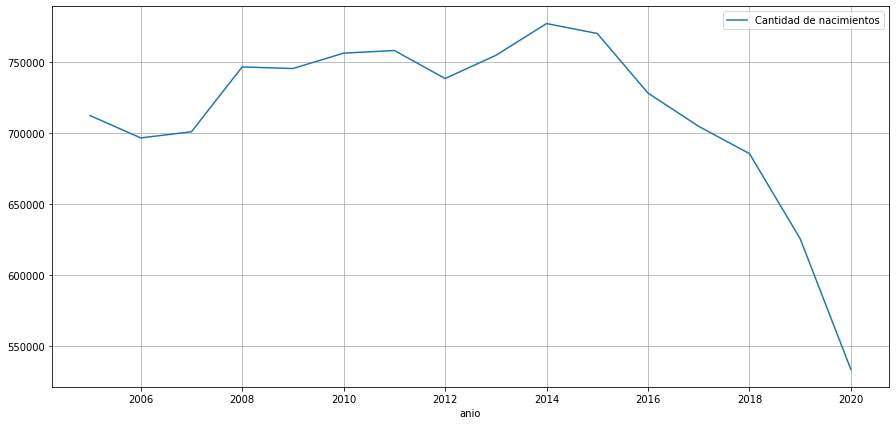

In [ ]:
nac_por_año.plot(kind= "line",figsize= (15,7),grid=True)
plt.legend(["Cantidad de nacimientos"])

Hay un problema con el gráfico, el eje y no comienza en 0 y hace que el gráfico se vea mal, esto se soluciona indicando el límite inferior de y:
También establecemos la leyenda del gráfico

In [ ]:
nac_por_año.plot(kind= "line",figsize= (15,7),ylim=(0),grid=True)
plt.legend(["Cantidad de nacimientos"])

## Pregunta: ¿Cuántos nacimientos hay por año en el país según el grupo etario de la madre? <a name="paragraph3"></a>


En este caso necesitamos saber el año, el grupo etario de la madre y la cantidad:

In [ ]:
nac_edad_madre = nacimientos[["anio","edad_madre_grupo","nacimientos_cantidad"]]

Hay algunos nacimientos donde el grupo etario de la madre no fue especificado, por lo tanto no podemos sacar conclusiones, asique se ignoran.

In [ ]:
nac_edad_madre.drop(nac_edad_madre.index[nac_edad_madre['edad_madre_grupo'] == "Sin especificar"], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Ahora con la información filtrada, hay que agrupar por dos criterios, primero por el año y luego por el grupo etario y finalmente sumar las cantidades de estos grupos:

In [ ]:
nac_edad_madre = nac_edad_madre.groupby(["anio","edad_madre_grupo"]).sum()
nac_edad_madre.head()

nacimientos_cantidad
anio edad_madre_grupo                      
2005  Menor de 15                      2699
     15 a 19                         104410
     20 a 24                         177813
     25 a 29                         182778
     30 a 34                         141689

La información como está no puede ser graficada, ya que está toda junta en 2 grupos, asi que usamos la función .unstack(), que despliega la información para que se puede visualizar

In [ ]:
nac_edad_madre = nac_edad_madre.unstack()
nac_edad_madre.head()

nacimientos_cantidad                                          \
edad_madre_grupo          Menor de 15 15 a 19 20 a 24 25 a 29 30 a 34 35 a 39   
anio                                                                            
2005                             2699  104410  177813  182778  141689   73194   
2006                             2766  103885  174342  176931  139003   73177   
2007                             2841  106720  174679  175632  139393   73532   
2008                             2937  112034  183265  184978  153805   80258   
2009                             3346  113478  182747  178935  155464   81397   

                                      
edad_madre_grupo 40 a 44 De 45 y más  
anio                                  
2005               21382        1575  
2006               19866        1488  
2007               19879        1497  
2008               20824        1630  
2009               20840        1546

Finalmente graficamos como en los ejemplos anteriores, con la diferencia de que ahora hay varios grupos lo que nos da varias líneas. No existe el mismo problema del eje y ya que ciertos grupos tienen muy pocos nacimientos y esto hace que el eje empiece en 0:

In [ ]:
nac_edad_madre.plot(kind= "line",figsize= (30,15),grid=True)
plt.legend(["Menor de 15", "15 a 19", "20 a 24", "25 a 29", "30 a 34", "35 a 39", "40 a 44", "De 45 y más"])

## Pregunta: ¿Que proporción de madres tuvo hijos antes de los 20? <a name="paragraph4"></a>


Igual que los ejemplos anteriores, obtenemos las columnas de interés. Pero si consultamos cuáles son los valores únicos que tiene la columna "edad_madre:grupo" nos encontramos con filas que no tienen información significativa

In [ ]:
nac_madre_menor_20 = nacimientos[["edad_madre_grupo","nacimientos_cantidad"]]
nac_madre_menor_20["edad_madre_grupo"].unique()

array(['30 a 34', '25 a 29', '20 a 24', '15 a 19', 'Sin especificar',
       '40 a 44', 'De 45 y más', ' Menor de 15', '35 a 39'], dtype=object)

Eliminamos las filas que dicen 'Sin especificar' 

In [ ]:
nac_madre_menor_20 = nac_madre_menor_20.drop(nac_madre_menor_20[nac_madre_menor_20['edad_madre_grupo'] == "Sin especificar"].index)

In [ ]:
nac_madre_menor_20.groupby("edad_madre_grupo")["nacimientos_cantidad"].count().plot(kind='pie')

Luego agrupamos los nacimientos en dos categorías, basado en si cumple o no la condición: Si está en los grupos " Menor de 15" o "15 a 19", ponerlos en un  grupo, sino en otro grupo. (la | es el equivalente a un "o")

In [ ]:
nac_madre_menor_20 = nac_madre_menor_20.groupby(
                        (nac_madre_menor_20.edad_madre_grupo == " Menor de 15") 
                        | (nac_madre_menor_20.edad_madre_grupo == "15 a 19"))

Luego sumamos los nacimientos de cada grupo:

In [ ]:
nac_madre_menor_20 = nac_madre_menor_20.sum()
nac_madre_menor_20.head()

nacimientos_cantidad
edad_madre_grupo                      
False                          9630285
True                           1657570

Hay un problema con esta información, en la columna de grupo dece "True" y "False", esto es por la operación de clasificación de más arriba. Esto se soluciona en el gráfico usando las etiquetas definidas en la lista etiquetas y pasandoselas al gráfico.

Finalmente, graficamos con un gráfico de torta para mostrar la propoción visualmente, agregando algunas cosas como los porcentajes (con autopct ='%.2f'), el título y el tamaño.

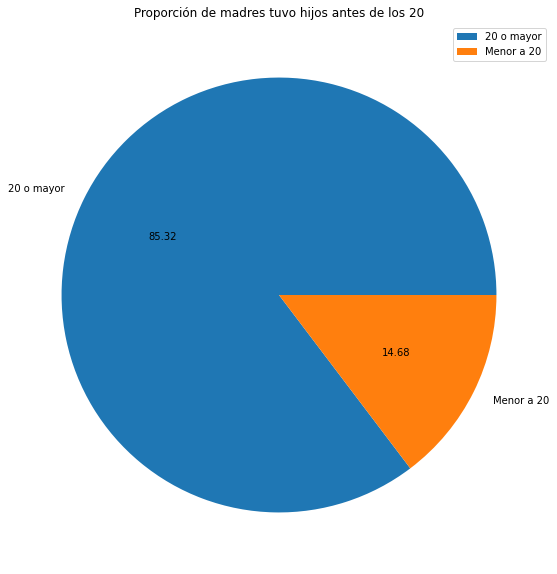

In [ ]:
etiquetas= ["20 o mayor", "Menor a 20"]
nac_madre_menor_20.plot(kind='pie', y='nacimientos_cantidad', figsize=(10, 10),
                          autopct='%.2f',title = "Proporción de madres tuvo hijos antes de los 20",
                          labels=etiquetas
                        ,ylabel="")

plt.legend(etiquetas)

In [ ]:
nac_madre_menor_20 = nac_madre_menor_20.rename({True:'Menor a 20',False:'20 o mayor'})
nac_madre_menor_20.head()

nacimientos_cantidad
edad_madre_grupo                      
20 o mayor                     9630285
Menor a 20                     1657570

##Pregunta: Para cada nivel de instrucción/educación, ¿Cuántos nacimientos hubo en cada grupo etario? <a name="paragraph5"></a>


Primero obtenemos la información necesaria para responder la pregunta, esta está en las columnas: instruccion_madre , edad_madre_grupo y nacimientos_cantidad

In [ ]:
nac_edad_edu_madre= nacimientos[["instruccion_madre","edad_madre_grupo","nacimientos_cantidad"]]
nac_edad_edu_madre.head()

instruccion_madre edad_madre_grupo  nacimientos_cantidad
0  Secundaria/Polimodal Incompleta          30 a 34                     1
1         Primaria/C. EGB Completa          30 a 34                     2
2    Secundaria/Polimodal Completa          25 a 29                     6
3  Secundaria/Polimodal Incompleta          30 a 34                     5
4    Secundaria/Polimodal Completa          25 a 29                     1

Como en la pregunta anterior hay dos campos que tienen "sin especificar", los ignoramos:

In [ ]:
nac_edad_edu_madre.drop(nac_edad_edu_madre.index[nac_edad_edu_madre['edad_madre_grupo'] == "Sin especificar"], inplace = True)
nac_edad_edu_madre.drop(nac_edad_edu_madre.index[nac_edad_edu_madre['instruccion_madre'] == "Sin especificar"], inplace = True)
nac_edad_edu_madre.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


instruccion_madre edad_madre_grupo  nacimientos_cantidad
0  Secundaria/Polimodal Incompleta          30 a 34                     1
1         Primaria/C. EGB Completa          30 a 34                     2
2    Secundaria/Polimodal Completa          25 a 29                     6
3  Secundaria/Polimodal Incompleta          30 a 34                     5
4    Secundaria/Polimodal Completa          25 a 29                     1

Agrupamos por instrucción/educación de la madre y grupo etario, luego se suma la cantidad de nacimientos por esas categorías:

In [ ]:
nac_edad_edu_madre = nac_edad_edu_madre.groupby(["instruccion_madre","edad_madre_grupo"]).sum()
nac_edad_edu_madre.head()

nacimientos_cantidad
instruccion_madre        edad_madre_grupo                      
Primaria/C. EGB Completa  Menor de 15                     13561
                         15 a 19                         447330
                         20 a 24                         687506
                         25 a 29                         594204
                         30 a 34                         449616

Como agrupamos por dos categorías usamos unstack para graficar los datos más facilmente:

In [ ]:
nac_edad_edu_madre = nac_edad_edu_madre.unstack()
nac_edad_edu_madre.head()

nacimientos_cantidad                          \
edad_madre_grupo                         Menor de 15 15 a 19 20 a 24 25 a 29   
instruccion_madre                                                              
Primaria/C. EGB Completa                       13561  447330  687506  594204   
Primaria/C. EGB Incompleta                     13424  171170  172795  128707   
Secundaria/Polimodal Completa                    348  224291  862070  875452   
Secundaria/Polimodal Incompleta                13535  679556  722392  481346   
Sin instrucción                                  455    6851   10413   10255   

                                                                     
edad_madre_grupo                30 a 34 35 a 39 40 a 44 De 45 y más  
instruccion_madre                                                    
Primaria/C. EGB Completa         449616  271336   87279        6532  
Primaria/C. EGB Incompleta        95095   60494   22362        1998  
Secundaria/Polimodal Completa    655385  334111   80448        5187  
Secundaria/Polimodal Incompleta  305220  160782   44473        2972  
Sin instrucción                    8756    6030    2618         317

Finalmente graficamos con un gáfico de barras, donde cada grupo corresponde a un nivel de educación y cada barra a un grupo etario, mientras más alta la barra, más nacimientos. También agregamos un título y la leyenda:

In [ ]:
nac_edad_edu_madre.plot.bar(figsize= (25,13),xlabel="",title = "Cantidad de nacimientos por grupo etario y educación de la madre",grid=True)
plt.legend(["Menor de 15", "15 a 19", "20 a 24", "25 a 29", "30 a 34", "35 a 39", "40 a 44", "De 45 y más"])

#Extra

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


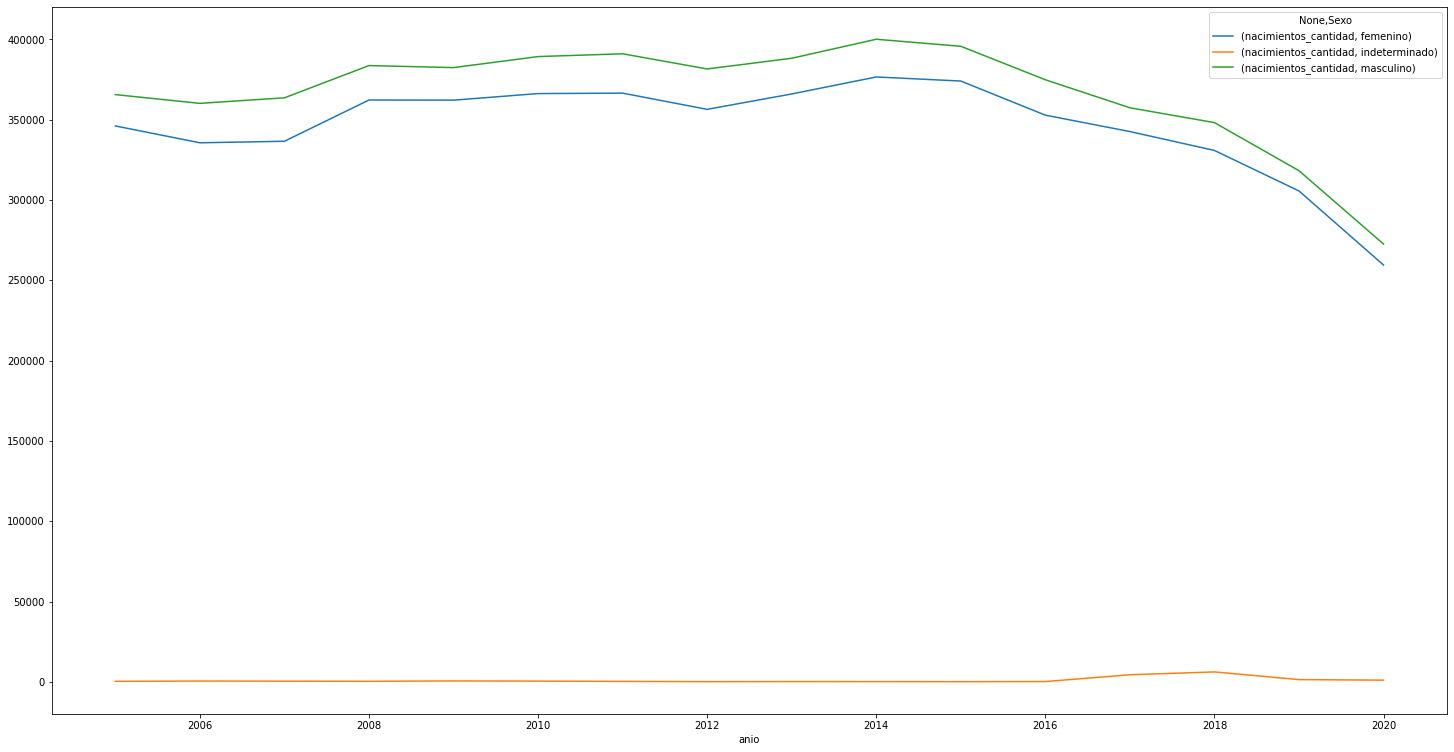

In [46]:
nacimientos_sexo_anio= nacimientos[["Sexo","anio","nacimientos_cantidad"]]
nacimientos_sexo_anio.replace(to_replace=["desconocido"],value="indeterminado",inplace=True)
nacimientos_sexo_anio= nacimientos_sexo_anio.groupby(["anio","Sexo"]).sum()
nacimientos_sexo_anio.unstack().plot(figsize= (25,13))

# Referencias técnicas <a name="paragraph6"></a>


---
Este es un apartado más técnico sobre las funciones que se ven en la demostración
---
El lenguaje de programación que estamos utilizando es **Python**, un lenguaje muy popular para ciencia de datos, combinado con la librería *pandas*, también muy popular, ya que nos permite manejar los datos fácilmente y finalmente usamos *matplotlib* para graficar los datos.

Pandas trabaja con dataframes, estos son la estructura básica que vamos a manipular y funcionan como una tabla con filas y columnas.





---
## Funciones importantes
---
A lo largo de esta demostración vamos a usar 7 funciones principales:

### head:
Esta función nos permite ver las primeras 5 filas de un dataframe, además de los nombres de columnas. Es muy útil para visualizar una operación.


### groupby

Esta potente función, nos permite agrupar nuestra información basados en los valores de una columna y luego realizar operaciones con esos grupos.




### sum
Nos permite sumar los valores de un conjunto de datos, columna, fila, o en nuestro caso de los grupos de un groupby.



### drop
Esta función nos permite eliminar filas de un dataframe, hay que indicarle una condición para seleccionar cuales se borran.



### plot
Nos permite graficar los datos de un dataframe, le indicamos el tipo de gráfico con la instrucción *kind*, y tiene otros parámetros para cosas como tamaño, titulo, etc.


### plt.legend
Esta función nos permite especificar la leyenda que queremos en nuestro gráfico.

### unstack
Esta función nos permite desagrupar un dataframe compuesto de dataframes en uno solo con toda la información. Nos sirve para graficar datos que requieren de agrupación por más de una categoría.